In [1]:
#  Evaluation_Python_Notebook. 
#  This file demonstrates the model and the results that are generated for the same. 
#  Before runnning the file, you will have to download all the dependencies - ortools is the most important here.
#  To run this file, type Evaluation.py in cmd
#  After running, first you will see the synthetic graph that is created. After closing that, the model will 
#  start running and will give you the output in the form of another figure, in which you will see the paths that
#  connect all the nodes with their coordinates. After this, you will then see evaluation model beinf run.
#  This evaluation is done with the help of Google's OR-Tools. At the end, you will see the paths that
#  were evaluated using OR-Tools. You can see the paths created from our model as well.
#  This code is running both our model and Google's model on the same synthetic graph.
#  For graphs and figures that explain more about results, see Evaluation-Results.ipynb
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn
import haversine as hs
from haversine import Unit

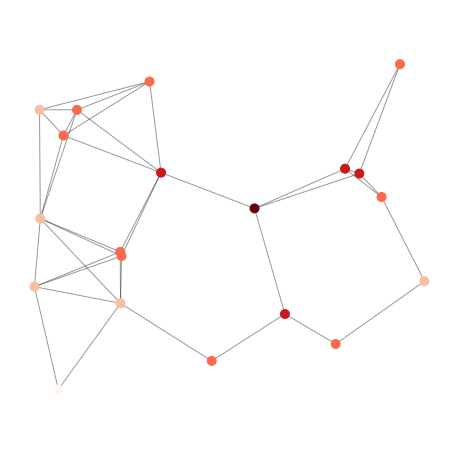

In [14]:
#Generation_of_Synthetic_Graph
#10: Number of nodes and 0.3: Density are defined first
## G: This is where the definition of the graph is stored
G = nx.random_geometric_graph(20, 0.3)
## pos: Details and attributes of G are stored here.
pos = nx.get_node_attributes(G, "pos")
## dmin: Least amount needed to break the loop.
dmin = 1
## ncenter: Updating the node center after each calculation.
ncenter = 0
## x,y: They signify the coordinates of a particular node.
for n in pos:
    ## x,y: They signify the coordinates of a particular node.
    x, y = pos[n]
    ## d: This stores the calculation of the equation which uses coordinates.
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d
        
## p: This is a dictionary which stores node information.        
p = dict(nx.single_source_shortest_path_length(G, ncenter))
## figsize: This controls the endproduct of the figure.
plt.figure(figsize=(8, 8))
## nodelist, aplha: This stores the list of nodes along with their coordinates.
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    ## nodesize: This defines the size of the node.
    node_size=80,
    ## nodecolour: This defines the colour of the node.
    node_color=list(p.values()),
    ## cmap: This stores the final figure plot information
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [15]:
## ll: This signifies the x-coordinate of the particular node.
ll = list()
for i in pos:
    ll.append(pos[i][0])
## rr: This signifies the y-coordinate of the particular node.    
rr = list()
for i in pos:
    rr.append(pos[i][1])
## df: This declares an empty dataframe. 

In [16]:
## df: This declares an empty dataframe.
df = pd.DataFrame()
df['Left'] = ll
df['Right'] = rr
df['coordinate'] = list(zip(df['Left'],df['Right']))
df['ID'] = df.index

In [17]:
##@dist_from
#Calculates the distance between the provided node coordinates.
# loc1: This stores coordinates of the first node.
# loc2: This stores coordinates of the second node.
def dist_from(loc1,loc2):
    ## dist: This stores the calculated distance of two nodes.
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [18]:
# parse location one by one to dist_from
for _,row in df.iterrows():
    df[row.ID]=df['coordinate'].apply(lambda x: dist_from(row.coordinate,x))

In [19]:
## distances_df: This stores the dataframe information of the sliced columns.    
distances_df=df.iloc[:,4:4183]
distances_df.insert(0, 'ID', df.ID)

In [20]:
## locations: This stores the nodes along with their coordinates in the form of a dictionary.
locations = dict( ( ID, (df.loc[ID, 'Left'], df.loc[ID, 'Right']) ) for ID in df.index)
locations

{0: (0.9178502915441699, 0.905214730976211),
 1: (0.08856241929214193, 0.7248100148781363),
 2: (0.3008528854767476, 0.8612898063942787),
 3: (0.029582214150372987, 0.7898527302818684),
 4: (0.23179200234961184, 0.41997122286211486),
 5: (0.8177122948029332, 0.6284939858547879),
 6: (0.22927098356459208, 0.30036117664440876),
 7: (0.782484431929554, 0.6407364196397588),
 8: (0.7594175972474877, 0.19749579303119313),
 9: (0.45394112812087317, 0.15462822326682968),
 10: (0.6343580981204858, 0.2732866949825976),
 11: (0.8725335819913281, 0.5693319921296618),
 12: (0.3290518268480048, 0.6307986574555042),
 13: (0.07604130726761493, 0.08242158454221593),
 14: (0.9781697511680171, 0.3562177361646619),
 15: (0.01711452526589985, 0.3423036991957582),
 16: (0.5595090882109395, 0.5403891969866034),
 17: (0.22848670351068, 0.4304848697145377),
 18: (0.12192601062976294, 0.7896352768703758),
 19: (0.031617002580366704, 0.5145961058004608)}

In [21]:
distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,94.37,68.78,99.60,93.44,32.72,101.91,33.03,80.63,...,77.01,37.68,72.23,130.89,61.40,118.11,56.86,93.07,89.43,107.69
1,1,94.37,0.00,28.06,9.76,37.45,81.78,49.72,77.72,94.88,...,78.76,88.87,28.71,71.44,107.07,43.27,56.24,36.24,8.11,24.22
2,2,68.78,28.06,0.00,31.19,49.67,63.03,62.88,58.90,89.71,...,75.17,71.38,25.82,90.14,93.95,65.77,45.83,48.57,21.43,48.81
3,3,99.60,9.76,31.19,0.00,46.87,89.45,58.78,85.35,104.52,...,88.44,96.89,37.70,78.83,115.98,49.78,65.13,45.67,10.27,30.61
4,4,93.44,37.45,49.67,46.87,0.00,69.15,13.30,65.97,63.67,...,47.64,73.16,25.82,41.34,83.30,25.39,38.82,1.23,42.88,24.62
5,5,32.72,81.78,63.03,89.45,69.15,0.00,74.92,4.15,48.36,...,44.45,8.97,54.34,102.41,35.14,94.54,30.34,69.12,79.42,88.32
6,6,101.91,49.72,62.88,58.78,13.30,74.92,0.00,72.22,60.05,...,45.14,77.53,38.38,29.62,83.51,24.05,45.40,14.47,55.70,32.41
7,7,33.03,77.72,58.90,85.35,65.97,4.15,72.22,0.00,49.35,...,44.05,12.78,50.43,100.12,38.39,91.35,27.19,65.89,75.29,84.66
8,8,80.63,94.88,89.71,104.52,63.67,48.36,60.05,49.35,0.00,...,16.26,43.21,67.91,77.06,30.05,84.10,44.13,64.47,96.75,88.28
9,9,98.11,75.30,80.40,84.94,38.48,66.42,29.78,65.24,34.30,...,24.01,65.52,54.74,42.78,62.45,52.87,44.47,39.61,79.68,61.70


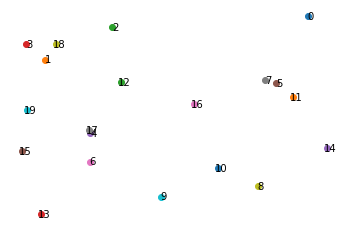

In [22]:
## l: It iterates over every instance of the locations dictionary
for l in locations:
    # lo: This stores an instance of the locations dictionary
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')    
plt.gca().axis('off');

In [23]:
## df1: This declares an empty dataframe.
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop(['Left'],axis=1)
df1 = df1.drop(['Right'],axis=1)
df1 = df1.drop(['coordinate'],axis=1)
df1 = df1.drop(['ID'],axis=1)

In [24]:
## distance: This stores values and date from df1.
distance = df1

In [25]:
## distances: This is a dictionary that stores distances from each node with all other nodes.
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)


In [26]:
## V: This defines the total number of vehicles that will traverse the path.
V = 5

In [27]:
## prob: This initializes the problem that will run using provided constraints.
prob=LpProblem("vehicle", LpMinimize)

In [28]:
## indicator: This defines the variable dictionary consisting of distances and indicates if location i is connected to location j along route
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
## eliminator: This defines the variable dictionary consisting of the node ID's and elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [29]:
## cost: This stores the result of distances calculations.
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [30]:
#constraints
for v in df.ID:
    cap = 1 if v != 12 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 12 and j!= 12) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [31]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 1min 55s
Optimal


In [32]:
## feasibleedges: This stores values of edges after the calculations are done.
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]
##@get_next_loc
# This provides with the next coordinates for the next node in the path.
def get_next_loc(initial):
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [33]:
## routes: This stores information regarding paths.    
routes = get_next_loc(12)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=12:
        r.append(get_next_loc(r[-1][1])[-1])

In [34]:
routes

[[(12, 0), (0, 5), (5, 7), (7, 16), (16, 12)],
 [(12, 2), (2, 18), (18, 3), (3, 1), (1, 12)],
 [(12, 6), (6, 4), (4, 17), (17, 12)],
 [(12, 9), (9, 13), (13, 15), (15, 19), (19, 12)],
 [(12, 11), (11, 14), (14, 8), (8, 10), (10, 12)]]

In [35]:
routes1 = routes

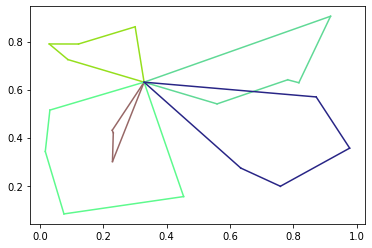

In [36]:
## coloured_loc: This stores information according to individual paths.        
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

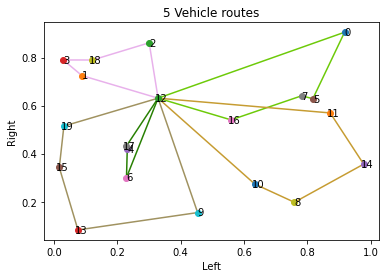

In [37]:
## coloured_loc: This stores information according to individual paths.        
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [38]:
routes

[[(12, 0), (0, 5), (5, 7), (7, 16), (16, 12)],
 [(12, 2), (2, 18), (18, 3), (3, 1), (1, 12)],
 [(12, 6), (6, 4), (4, 17), (17, 12)],
 [(12, 9), (9, 13), (13, 15), (15, 19), (19, 12)],
 [(12, 11), (11, 14), (14, 8), (8, 10), (10, 12)]]

In [39]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [40]:
##@ package create_data_model
# Stores the data for the problem.
def create_data_model():
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 5
    data['depot'] = 12
    return data

In [41]:
##@print_solution
#Prints solution on console.
def print_solution(data, manager, routing, solution):
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [42]:
##@main
#Solve the CVRP problem.
def main():
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    ##Returns the distance between the two nodes.
    def distance_callback(from_index, to_index):
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

Route for vehicle 0:
 12 ->  2 ->  18 ->  3 ->  1 -> 12

Route for vehicle 1:
 12 ->  10 ->  8 ->  9 -> 12

Route for vehicle 2:
 12 ->  11 ->  14 ->  16 -> 12

Route for vehicle 3:
 12 ->  7 ->  5 ->  0 -> 12

Route for vehicle 4:
 12 ->  19 ->  15 ->  13 ->  6 ->  4 ->  17 -> 12



In [43]:
routes

[[(12, 0), (0, 5), (5, 7), (7, 16), (16, 12)],
 [(12, 2), (2, 18), (18, 3), (3, 1), (1, 12)],
 [(12, 6), (6, 4), (4, 17), (17, 12)],
 [(12, 9), (9, 13), (13, 15), (15, 19), (19, 12)],
 [(12, 11), (11, 14), (14, 8), (8, 10), (10, 12)]]

In [44]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()    

Route for vehicle 0:
 12 ->  2 ->  18 ->  3 ->  1 -> 12
Distance of the route: 93m

Route for vehicle 1:
 12 ->  10 ->  8 ->  9 -> 12
Distance of the route: 156m

Route for vehicle 2:
 12 ->  11 ->  14 ->  16 -> 12
Distance of the route: 163m

Route for vehicle 3:
 12 ->  7 ->  5 ->  0 -> 12
Distance of the route: 158m

Route for vehicle 4:
 12 ->  19 ->  15 ->  13 ->  6 ->  4 ->  17 -> 12
Distance of the route: 150m

Maximum of the route distances: 163m


In [45]:
routes

[[(12, 0), (0, 5), (5, 7), (7, 16), (16, 12)],
 [(12, 2), (2, 18), (18, 3), (3, 1), (1, 12)],
 [(12, 6), (6, 4), (4, 17), (17, 12)],
 [(12, 9), (9, 13), (13, 15), (15, 19), (19, 12)],
 [(12, 11), (11, 14), (14, 8), (8, 10), (10, 12)]]

In [46]:
distance[12][0]+distance[0][5]+distance[5][7]+distance[7][16]+distance[16][12]

163.82000000000002

In [47]:
distance[12][2]+distance[2][18]+distance[18][3]+distance[3][1]+distance[1][12]

95.99000000000001

In [48]:
distance[12][6]+distance[6][4]+distance[4][17]+distance[17][12]

77.83000000000001

In [49]:
distance[12][9]+distance[9][13]+distance[13][15]+distance[15][19]+distance[19][12]

181.89

In [50]:
distance[12][11]+distance[11][14]+distance[14][8]+distance[8][10]+distance[10][12]

185.85999999999999

In [52]:
93+150+156+158+163

720

In [53]:
78+96+164+182+186

706

In [54]:
result = pd.DataFrame()
result['OP-Route'] = 78,96,164,182,186
result['OR-Tools'] = 93,150,156,158,163

In [55]:
result

,OP-Route,OR-Tools
0,78,93
1,96,150
2,164,156
3,182,158
4,186,163


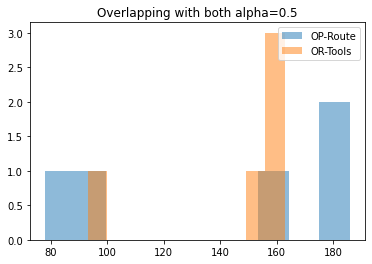

In [56]:
plt.hist(result['OP-Route'], 
         alpha=0.5, # the transaparency parameter
         label='OP-Route')
  
plt.hist(result['OR-Tools'],
         alpha=0.5,
         label='OR-Tools')
  
plt.legend(loc='upper right')
plt.title('Overlapping with both alpha=0.5')
plt.show()

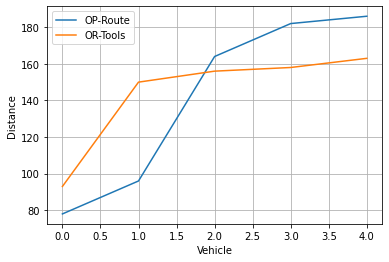

In [57]:
plt.plot(result['OP-Route'], label='OP-Route')
plt.plot(result['OR-Tools'], label='OR-Tools')
plt.xlabel('Vehicle')
plt.ylabel('Distance')
plt.grid(True)
plt.legend()

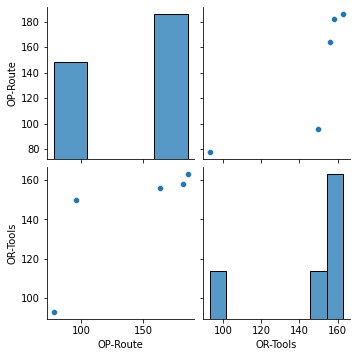

In [58]:
import seaborn as sns
sns.pairplot(result)

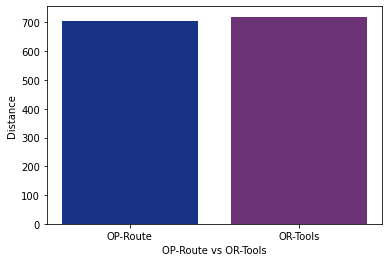

In [59]:
# the first call is as usual
plt.bar('OP-Route',result['OP-Route'].sum(), color="#183386")
plt.bar('OR-Tools',result['OR-Tools'].sum(), color="#6c3376")
plt.xlabel('OP-Route vs OR-Tools')  
plt.ylabel('Distance')

plt.show()  

In [62]:
c_result = pd.DataFrame()
c_result['model'] = 'OP-Route','OP-Route','OP-Route','OP-Route','OP-Route','OR-Tools','OR-Tools','OR-Tools','OR-Tools','OR-Tools'
c_result['Total Distance'] = 78,96,164,182,186,93,150,156,158,163

In [63]:
c_result

,model,Total Distance
0,OP-Route,78
1,OP-Route,96
2,OP-Route,164
3,OP-Route,182
4,OP-Route,186
5,OR-Tools,93
6,OR-Tools,150
7,OR-Tools,156
8,OR-Tools,158
9,OR-Tools,163


<AxesSubplot:xlabel='model', ylabel='Total Distance'>

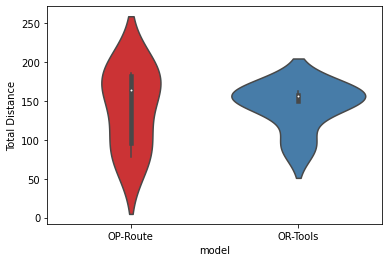

In [64]:
sns.violinplot(x="model", y="Total Distance", data=c_result,palette='Set1')

<AxesSubplot:xlabel='model', ylabel='Total Distance'>

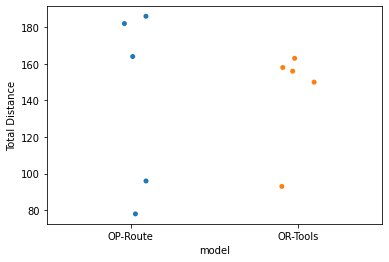

In [65]:
sns.stripplot(x="model", y="Total Distance", data=c_result)

<AxesSubplot:>

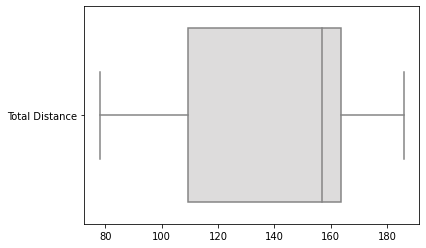

In [67]:
sns.boxplot(data=c_result,palette='coolwarm',orient='h')

<AxesSubplot:xlabel='model', ylabel='Total Distance'>

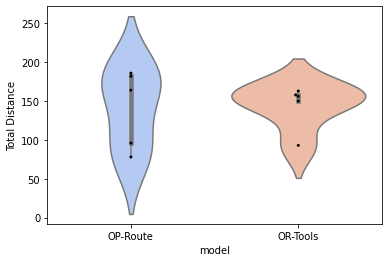

In [68]:
sns.violinplot(x="model", y="Total Distance", data=c_result,palette='coolwarm')
sns.swarmplot(x="model", y="Total Distance", data=c_result,color='black',size=3)

<AxesSubplot:>

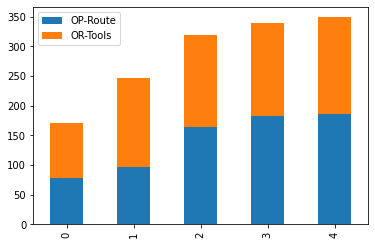

In [69]:
result.plot.bar(stacked=True)

<AxesSubplot:ylabel='Density'>

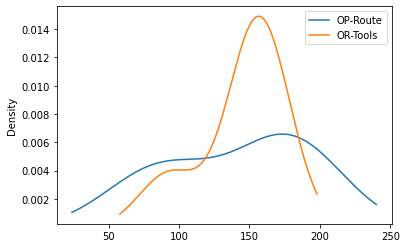

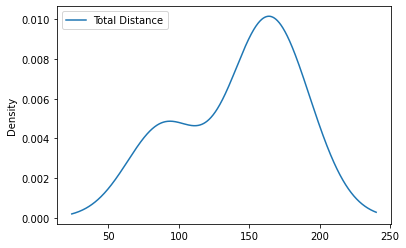

In [70]:
result.plot.density()
c_result.plot.density()

<AxesSubplot:>

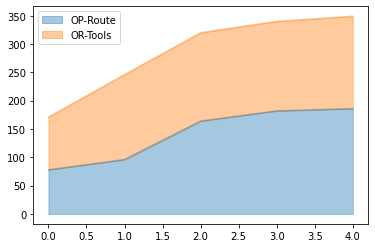

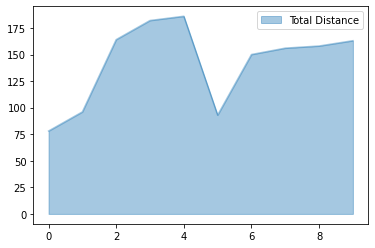

In [71]:
result.plot.area(alpha=0.4)
c_result.plot.area(alpha=0.4)